# Analyzing Mass & Light around Black Holes

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from einsteinpy.geodesic import Timelike
from einsteinpy.geodesic import Nulllike
from einsteinpy.plotting.geodesic import StaticGeodesicPlotter
from einsteinpy.hypersurface import SchwarzschildEmbedding
from einsteinpy.plotting import HypersurfacePlotter
from astropy import units as u
from einsteinpy.coordinates import SphericalDifferential
from einsteinpy.metric import Schwarzschild
from einsteinpy.geodesic import Geodesic

A black hole is an object of such high mass & density, that at its' center, the density of its mass is infinitely large. This produces some really interesting effects on spacetime that cannot exist anywhere else.

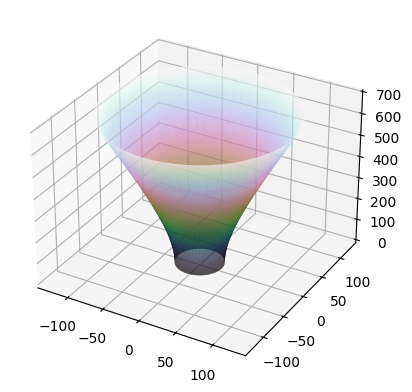

In [141]:
# Visualize Schwarzchild Black hole
surface_obj = SchwarzschildEmbedding(5.927e23 * u.kg)
surface = HypersurfacePlotter(embedding=surface_obj, plot_type='surface')
surface.plot()
surface.show()

In [142]:
def toSpherical(x, y, z): 
    # Helper function to convert cartesian coordinates to spherical
    r       =  np.sqrt(x*x + y*y + z*z)
    theta   =  np.arccos(z/r)
    phi     =  np.arctan2(y,x)
    return [r,theta,phi]

In [143]:
# Positions given by r, theta, phi
position = np.array([40., np.pi / 2, 0.])
momentum = np.array([0.0, 0.0, 3.83405]) 

# Spin is 0 since Schwarzchild black holes do not rotate
a = 0

# Solver steps, length of simulation
steps = 5500

# Step size
delta = 1

geod1 = Timelike(
    metric="Schwarzschild",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True
)

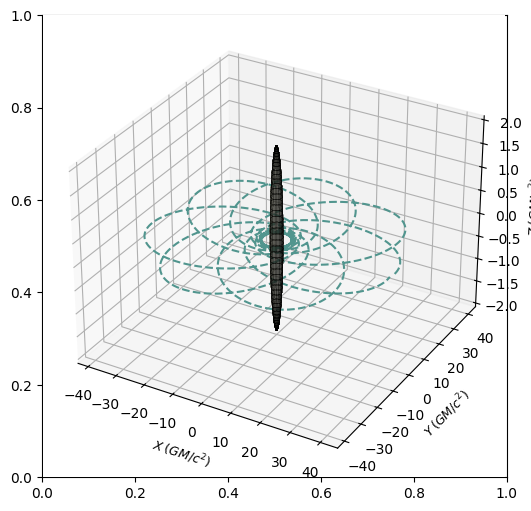

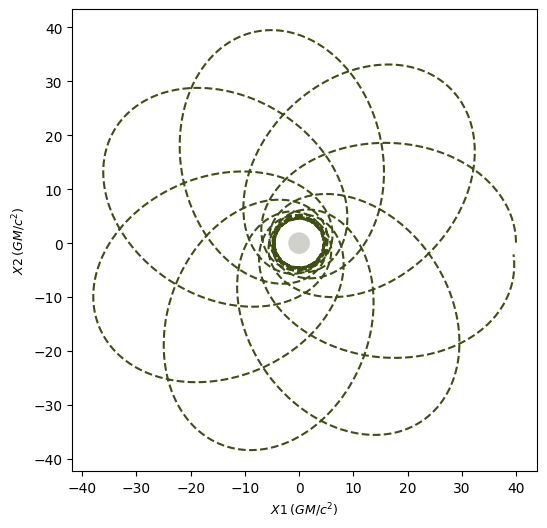

In [144]:
#Static geodesic plotter for the timelike geodesic
sgpl = StaticGeodesicPlotter()
sgpl.plot(geod1)
sgpl.plot2D(geod1, coordinates=(1, 2))

In [145]:
# Create light source
r = 2  # Radius of the spherical light source

# Generate arrays for theta and phi
#theta = np.linspace(0, np.pi, 10)  # Polar angle from 0 to pi
#phi = np.linspace(0, 2 * np.pi, 10)  # Azimuthal angle from 0 to 2pi

N = 1
theta = np.pi / 2
phi = np.pi / 2

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Translate the sphere away from the location of the BH
x += 4
r_new = np.sqrt(x**2 + y**2 + z**2)
theta_new = np.arccos(z / r_new)
phi_new = np.arctan2(y, x)

l_pos = []
l_mom = np.tile([0., 0., -2], (N, 1)).tolist()

light_origins = []
for i in range(len(l_pos)):
    pos = l_pos[i]
    mom = l_mom[i]
    geod = Nulllike(
        metric="Schwarzschild",
        metric_params=(.99,),
        position=pos,
        momentum=mom,
        steps=7440,
        delta=0.0005,
        omega=.001,
        return_cartesian=True
    )
    light_origins.append(geod)

## Behavior of light

In the following code cell, we see what a photon capture looks like as a photon passes the event horizon. In this situation, we are assuming that the BH has no spin, so the space around it does not spin either. The curvature, therefore, does not change with respect to time.

In [146]:
light_pos = [2.5, np.pi / 2, 0.]
light_mom = [0., 0., -2.]

step_size = 7600

light = Nulllike(
        metric="Schwarzschild",
        metric_params=(.99,),
        position=light_pos,
        momentum=light_mom,
        steps=step_size,
        delta=0.0005,
        omega=.001,
        return_cartesian=True
    )

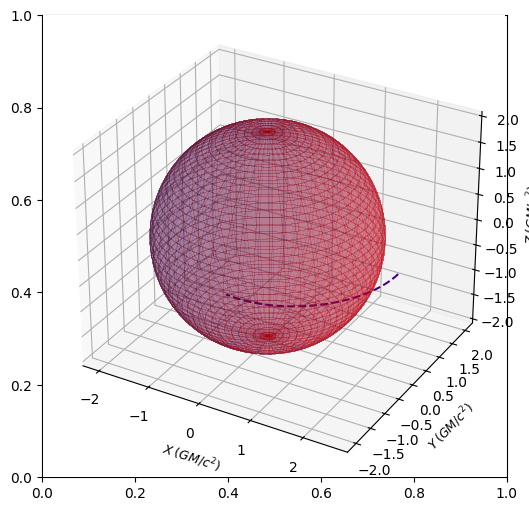

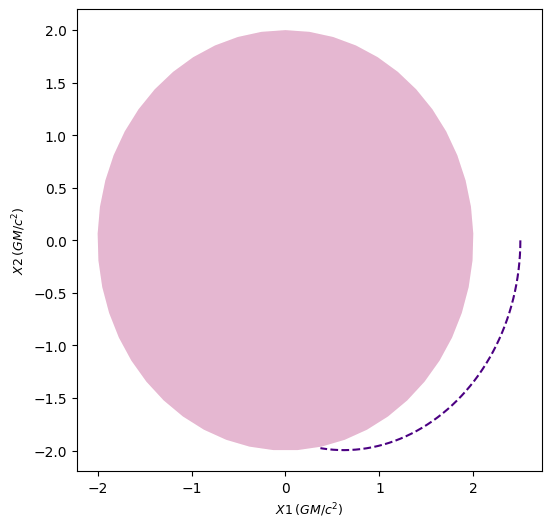

In [147]:
s = StaticGeodesicPlotter(bh_colors=("red", "blue"))
s.plot(light, color="indigo", aspect="equal")
s.plot2D(light, coordinates=(1, 2), color="indigo")

If we were to increase the length of the geodesic past the event horizon, the integral jumps immediately to infinity, and so our visualization gets thrown off as shown. The stability of the numerical integration algorithm degrades immediately past this point (i.e. python throws many runtime warnings). What the visualization doesn't capture well is that the previous path from the original position to the event horizon exists. But after this point, the photon's path suddenly points to to coordinates (infinity, infinity, infinity).

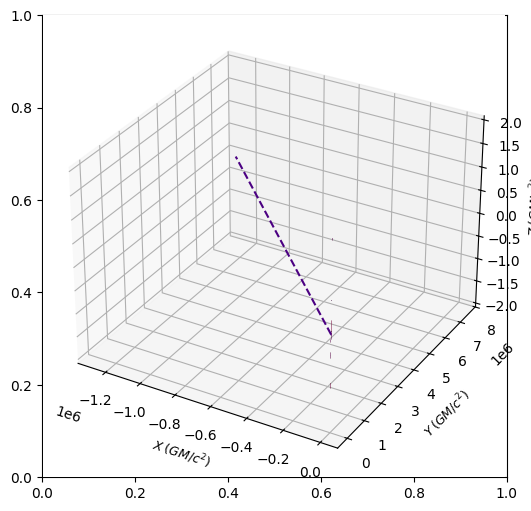

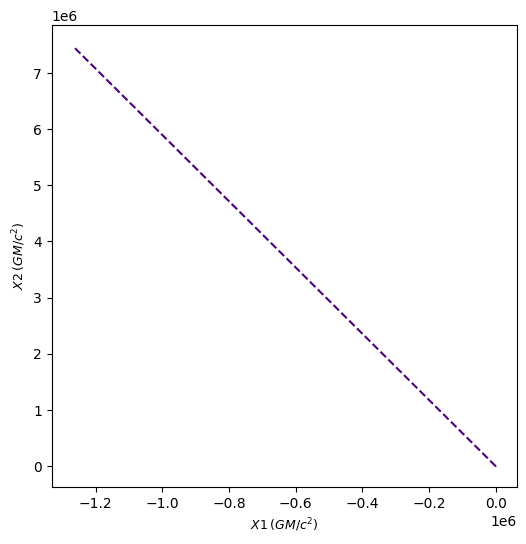

In [148]:
strange_step_size = 10000 # increase the length of the path so that it crosses the event horizon

strange = Nulllike(
        metric="Schwarzschild",
        metric_params=(.99,),
        position=light_pos,
        momentum=light_mom,
        steps=strange_step_size,
        delta=0.0005,
        omega=.001,
        return_cartesian=True
    )

s1 = StaticGeodesicPlotter(bh_colors=("red", "blue"))
s1.plot(strange, color="indigo")
s1.plot2D(strange, coordinates=(1, 2), color="indigo")

# Geodesics as a Function of Distance

How does the curvature of space change as we increase distances from the event horizon? We can visualize this by plotting multiple light geodesics and varying their point of origin as a function of the schwarzschild radius from the singularity at (0, 0).

In [149]:
positions = [toSpherical(1.0,-2.0,0), toSpherical(1.5,-2.0,0), toSpherical(2.00,-2.0,0), toSpherical(2.5,-2.0,0), toSpherical(3.0,-2.0,0)]
momentums = [[0, 0., np.pi*3/2], [0, 0., np.pi*3/2], [0, 0., np.pi*3/2], [0, 0., np.pi*3/2], [0, 0., np.pi*3/2]]

#Create a list to store geodesic objects
geodesics = []
for i in range(len(positions)):
    pos = positions[i]
    mom = momentums[i]
    #Nulllike geodesic object for the Kerr metric
    geod = Nulllike(
        metric="Kerr",
        metric_params=(.99,),
        position=pos,
        momentum=mom,
        steps=1000,
        delta=0.01,
        omega=.01,
        return_cartesian=True
    )
    geodesics.append(geod) 


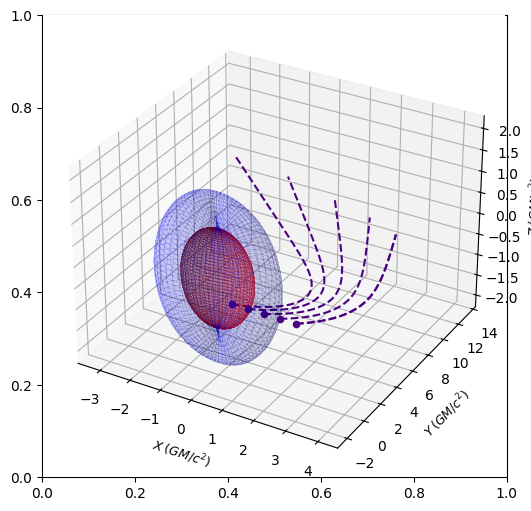

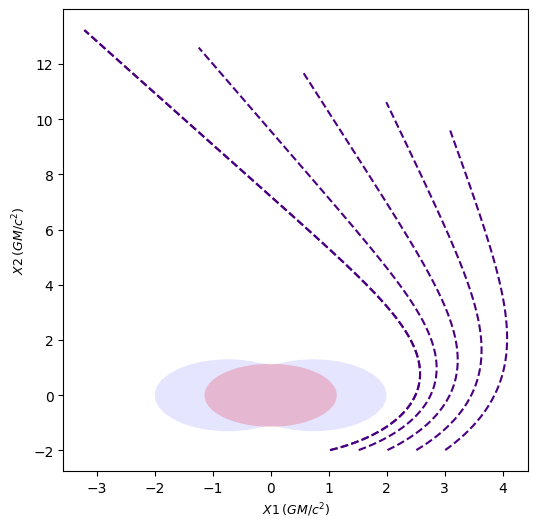

In [150]:
sgpl3 = StaticGeodesicPlotter(bh_colors=("red", "blue"))
sgpl3.plot(geod, color="indigo")
#Iterate through the list of geodesics to plot each trajectory
for geodesic in geodesics:
        traj = geodesic.trajectory[1]
 
        x = traj[:, 1]
        y = traj[:, 2]
        z = traj[:, 3]

        
        sgpl3.ax.scatter(x[0], y[0], z[0], color="indigo", s=20, label="start")
        sgpl3.ax.plot(x, y, z, "--", color="indigo", label=geodesic.kind + " Geodesic")

#Same ploting, but now 2D, top down perspective
sgpl3.plot2D(geodesics[0], color="indigo")
for geodesic in geodesics:
        traj = geodesic.trajectory[1]
 
        x = traj[:, 1]
        y = traj[:, 2]
        z = traj[:, 3]

        sgpl3.ax.plot(x, y, "--", color="indigo", label=geodesic.kind + " Geodesic")


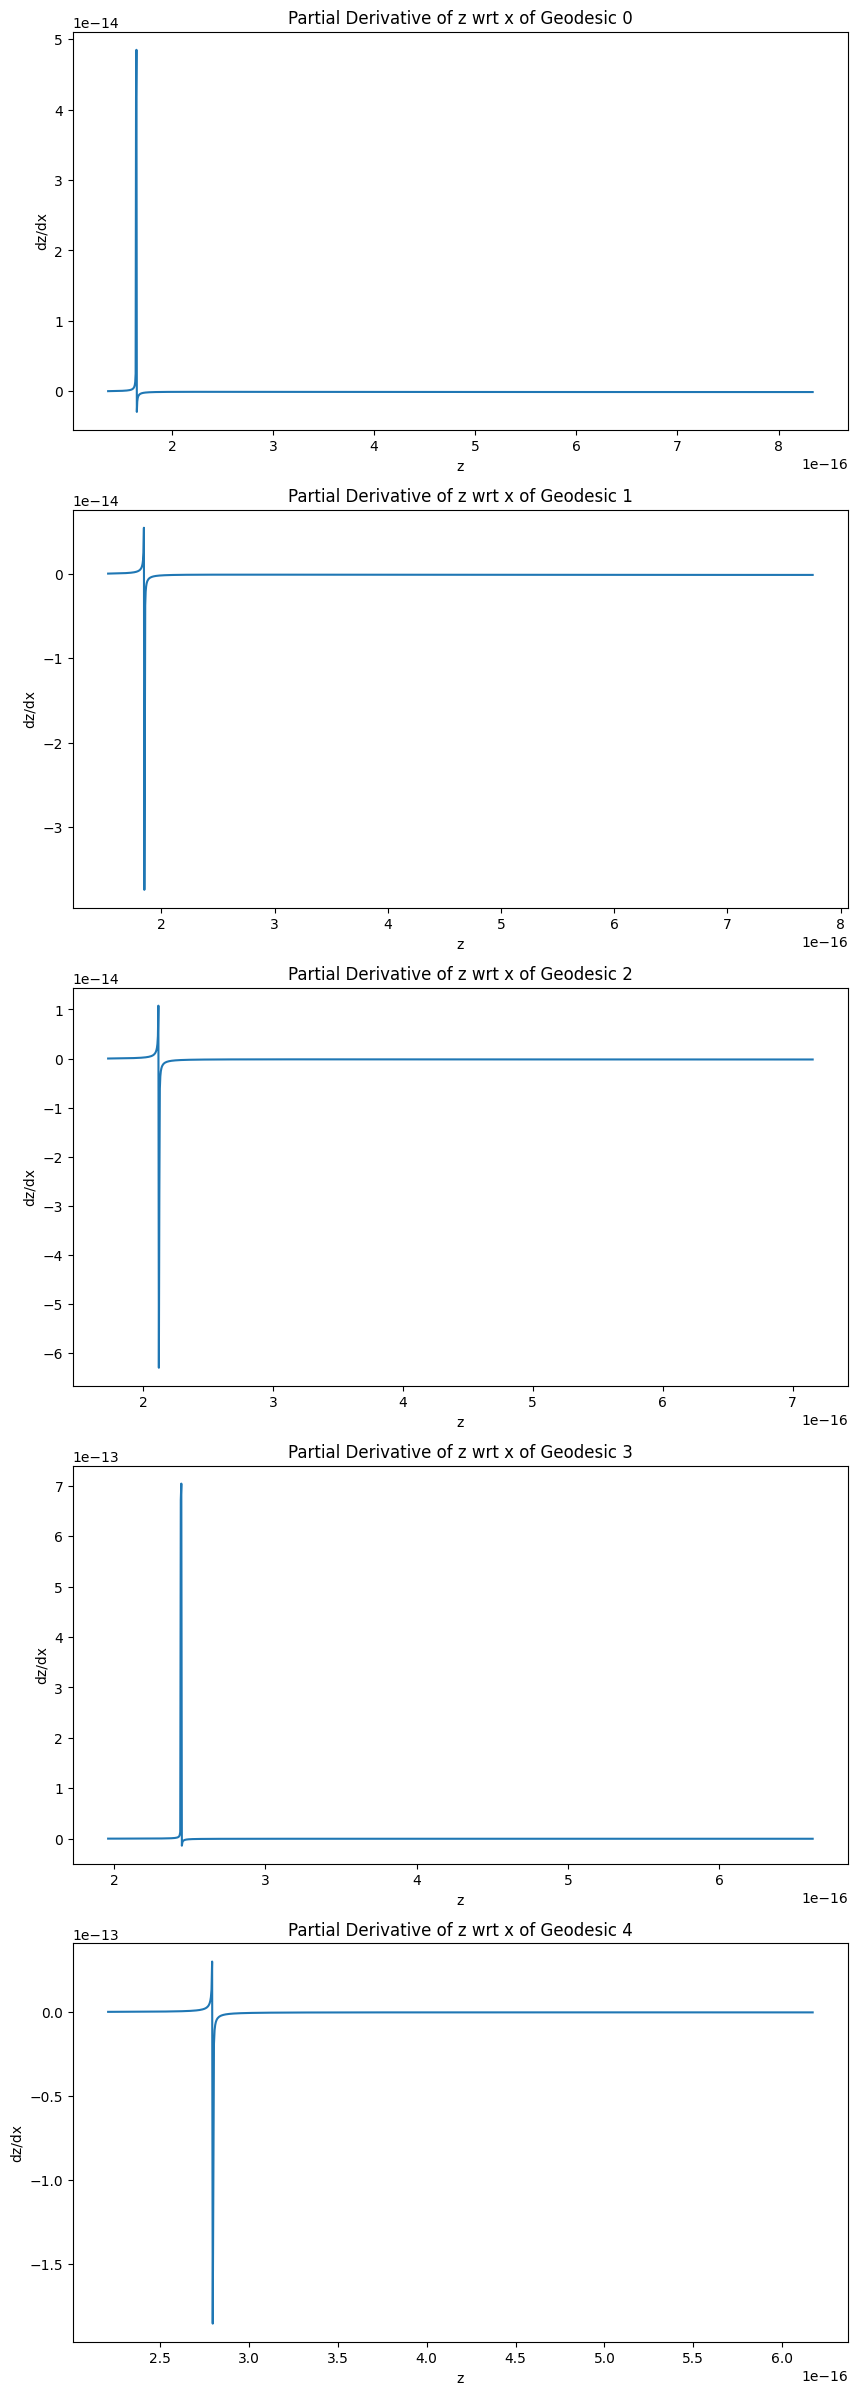

In [151]:
fig, axs = plt.subplots(len(geodesics), figsize=(10, 30))

gradients = []
independent = []
for i in range(len(geodesics)):
    traj = geodesics[i].trajectory[1]
    x = traj[:, 1]
    y = traj[:, 2]
    z = traj[:, 3]

    dz_dx = np.gradient(z, x)
    axs[i].set_title(f'Partial Derivative of z wrt x of Geodesic {i}')
    axs[i].set_ylabel('dz/dx')
    axs[i].set_xlabel('z')
    axs[i].plot(z, dz_dx)


## Frame Dragging
Why is there a significant change in the gradients of the geodesics?

As the photon approaches the ergosphere for a Kerr (spinning) Black hole, the photon co-rotates with the spin of the black hole. This significantly changes the gradient of the position vector of the photon, and makes it seem like there are highly deviant light behaviors not noticed in "regular" gravitational situations. The twisting space caused by the spinning of the black hole dynamically changes the path of the photon in line with the spin, a phenomenon known as Frame Dragging. In the perspective of the photon, it is still locally moving through space in a straight line, when in reality, to an observer outside of the gravitational effects (i.e. us), the photon's path is curved.
